# Introduction

The dataset, known as the "Bank Note Authentication UCI Data, contains 1,372 instances with four input features and one output variable (class label). The features are extracted from images of banknotes, and the class label indicates whether the banknote is authentic or counterfeit. 



The goal is to train a classification model using this dataset and evaluate its performance

## Table of Content

* [Importing Libraries](#import)
* [Loading Data](#load)
* [Data Preprocessing](#preprocess)
* [Exploratory Data Analysis](#eda)
* [Model Prediction and Evaluation](#model)

## <font color='green'>Importing Libraries<font><a class='anchor' id='import'>


In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#standard Libraries
import pandas as pd
import numpy as np
import re

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

#data transformation
from scipy import stats

#preprcossing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#model for classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


## <font color='green'>Loading Data<font><a class='anchor' id='load'>


In [2]:
data = pd.read_csv('BankNote_Authentication.csv')

In [3]:
#viewing random sample of the Dataset
data.sample(10)

,variance,skewness,curtosis,entropy,class
1326,-1.29430,2.67350,-0.84085,-2.03230,1
983,-2.03360,-1.40920,1.15820,0.36507,1
428,3.42460,-0.14693,0.80342,0.29136,0
643,0.38251,6.81210,1.81280,-0.61251,0
1030,-1.84390,-8.64750,7.67960,-0.66682,1
1000,-2.88290,3.89640,-0.18880,-1.16720,1
108,3.10600,9.54140,-4.25360,-4.00300,0
1252,-2.70830,-6.82660,7.53390,0.59007,1
797,0.81583,4.84000,-5.26130,-6.08230,1
933,-0.10234,1.81890,-2.21690,-0.56725,1


## Data Visualization

In [4]:
#checking the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data.shape

(1372, 5)

The dataset contains 1372 rows and 5 columns. All columns are of numeric data type.


The columns in the dataset can be describe as follows
- **Variance:** Variance of Wavelet Transformed image (continuous)
- **Skewness:** Skewness of Wavelet Transformed image (continuous)
- **Curtosis:** Curtosis of Wavelet Transformed Image (continuous)
- **Entropy:** Entropy of image (continuous)
- **Class:** Class label (0 for authentic, 1 for counterfeit)

The variables are:
1. Variance finds how each pixel varies from the neighboring pixels and classifies them into different regions
2. Skewness is the measure of the lack of symmetry
3. Curtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution
4. Entropy is a quantity which is used to describe the amount of information which must be coded for, by a compression algorithm


In [6]:
#checking duplicate values in dataset
data.duplicated().sum()

24

There are 24 duplicate values present, droping this values

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(1348, 5)

In [9]:
#checking for null values
data.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

There are no Null Values present

Text(0.5, 1.0, 'Distribution of Class label')

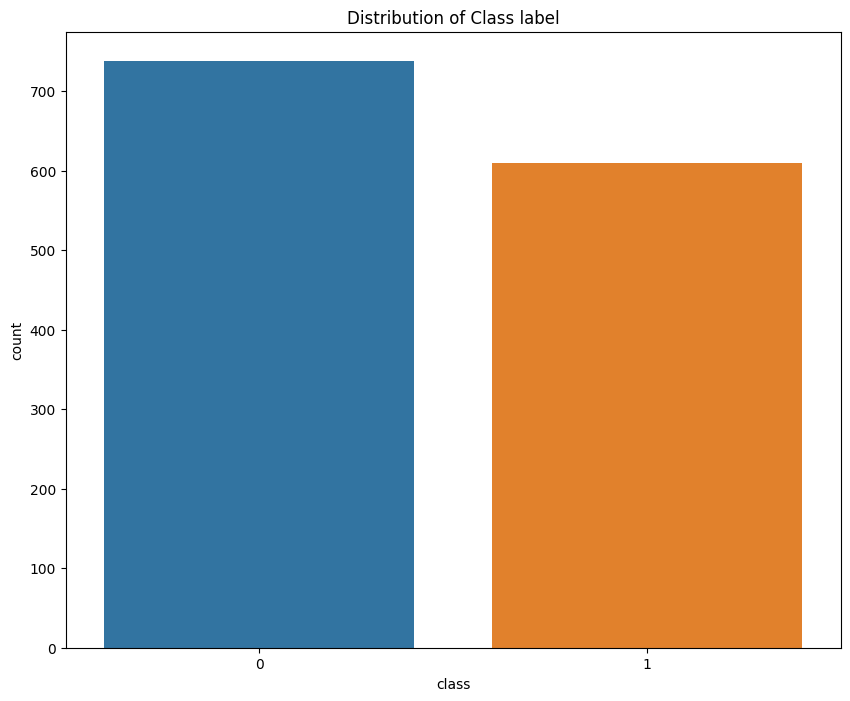

In [10]:
#checking the distribution of Target classes variable
sns.countplot(x=data['class'],data= data)
plt.title('Distribution of Class label')


The Classes are not that imbalanced so we can work with without droping the dataset

### Exploring `Variance` column

In [11]:
data['variance'].describe()

count    1348.000000
mean        0.445785
std         2.862906
min        -7.042100
25%        -1.786650
50%         0.518735
75%         2.853250
max         6.824800
Name: variance, dtype: float64

Text(0.5, 1.0, 'Distribution of Variance over Dataset')

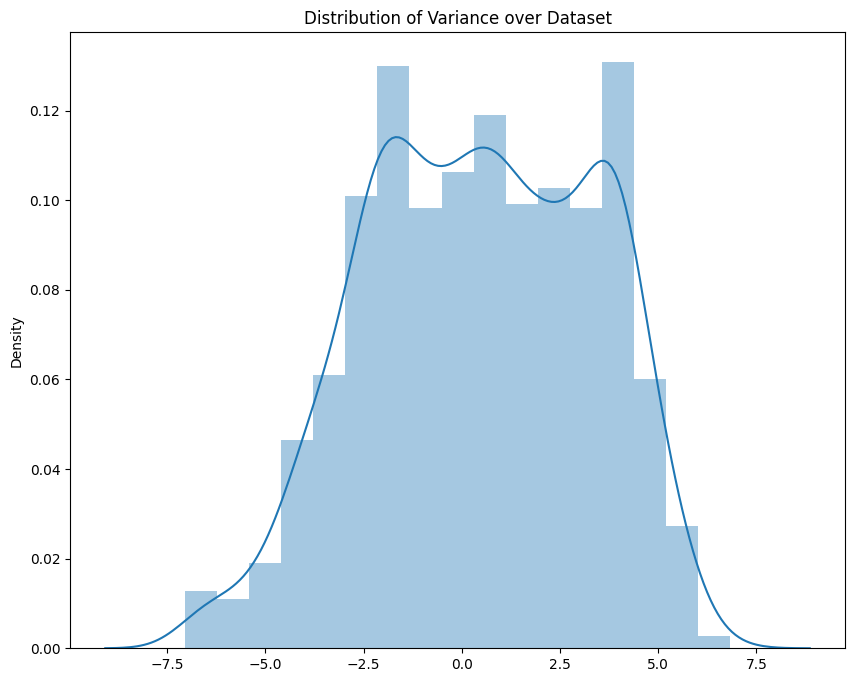

In [12]:
sns.distplot(x=data['variance'])
plt.title('Distribution of Variance over Dataset')

It can be observed from the plot, that curve is similar to `Bell Shaped` curve, hence the data for is this feature is normally distributed. So need to changing the values for this columns

### Exploring `Skewness` column

In [13]:
data['skewness'].describe()

count    1348.000000
mean        1.909039
std         5.868600
min       -13.773100
25%        -1.627000
50%         2.334150
75%         6.796025
max        12.951600
Name: skewness, dtype: float64

Text(0.5, 1.0, 'Distribution of skewness over dataset')

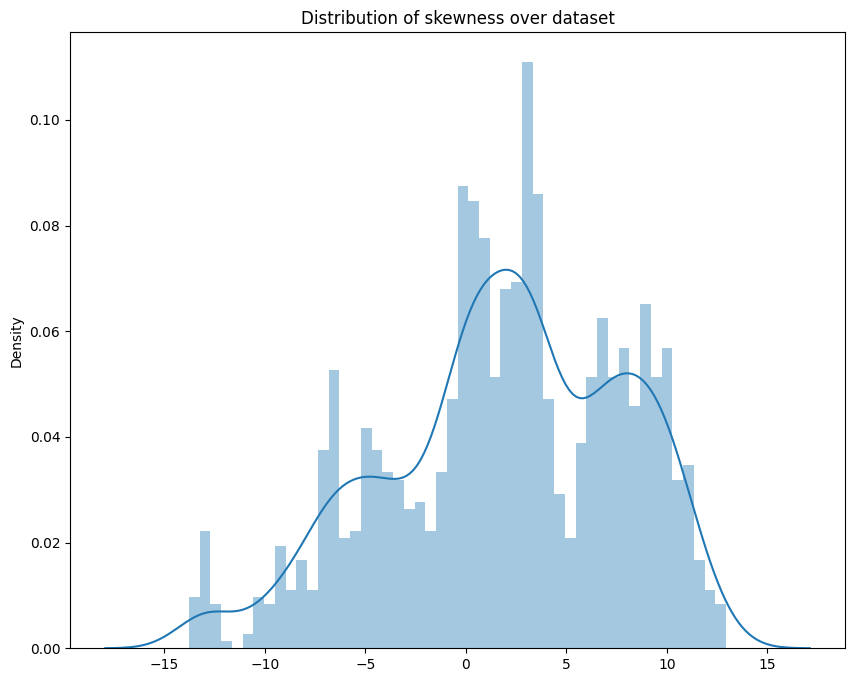

In [23]:
sns.distplot(x=data['skewness'],bins=50)
plt.title('Distribution of skewness over dataset')

It can be observed from the plot, that curve is similar to `Bell Shaped` curve, hence the data for is this feature is normally distributed. So need to changing the values for this columns

### Exploring `curtosis` column

In [14]:
data['curtosis'].describe()

count    1348.000000
mean        1.413578
std         4.328365
min        -5.286100
25%        -1.545600
50%         0.605495
75%         3.199800
max        17.927400
Name: curtosis, dtype: float64

Text(0.5, 1.0, 'Distribution of curtosis over dataset')

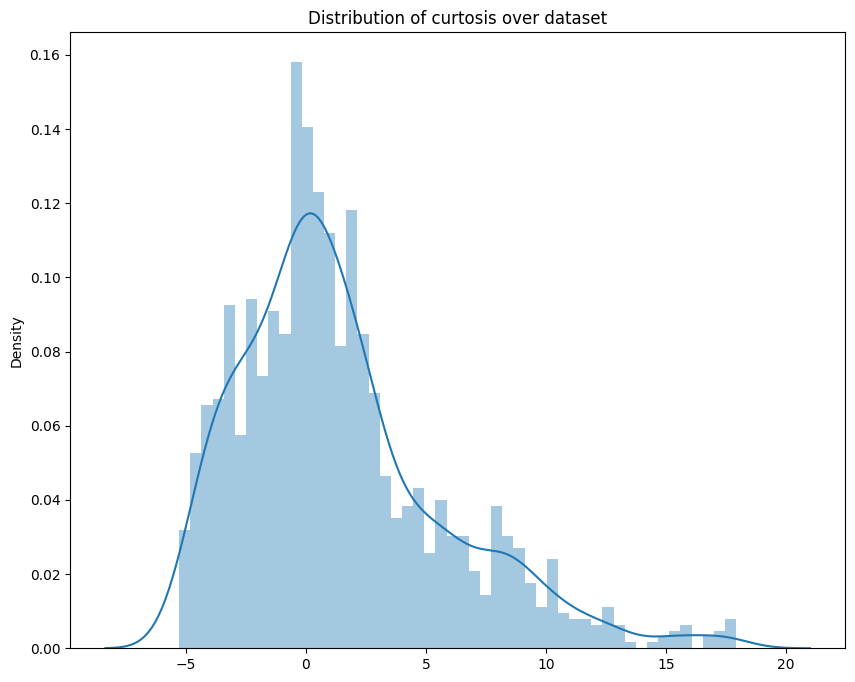

In [15]:
sns.distplot(x=data['curtosis'],bins=50)
plt.title('Distribution of curtosis over dataset')

As observed , this feature seems right-tail heavy. So it is `Left-skewed`. So we would need to perform some preprocessing on it.

### Exploring `entropy` column

In [16]:
data['entropy'].describe()

count    1348.000000
mean       -1.168712
std         2.085877
min        -8.548200
25%        -2.393100
50%        -0.578890
75%         0.403863
max         2.449500
Name: entropy, dtype: float64

Text(0.5, 1.0, 'Distribution of entropy over dataset')

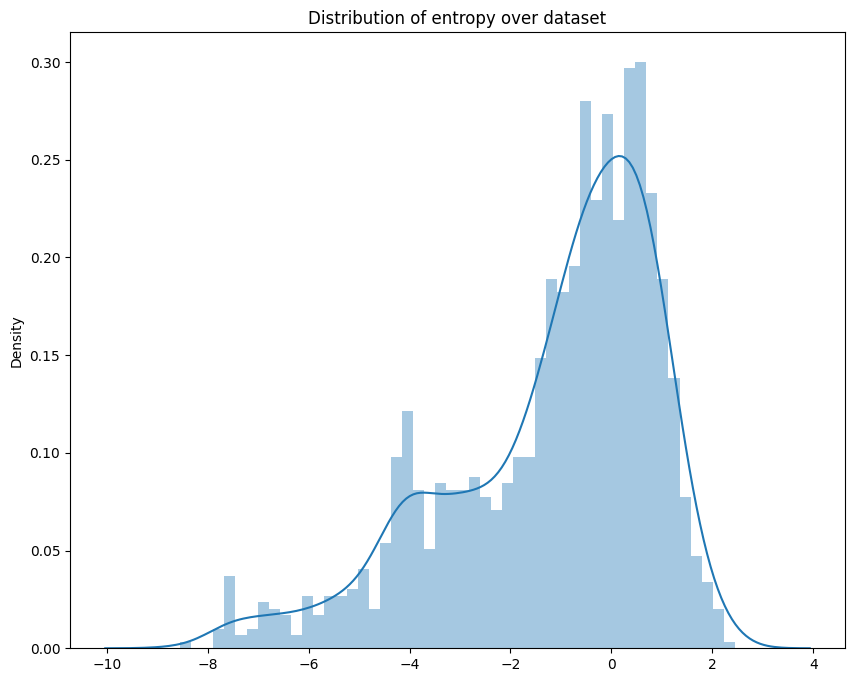

In [17]:
sns.distplot(x=data['entropy'],bins=50)
plt.title('Distribution of entropy over dataset')

As observed , this feature seems left-tail heavy. So it is `Right-skewed`. So we would need to perform some preprocessing on it.

## <font color='green'>Data Preprocessing<font><a class='anchor' id='preproces'>

We need to normalized the left and right skewed data

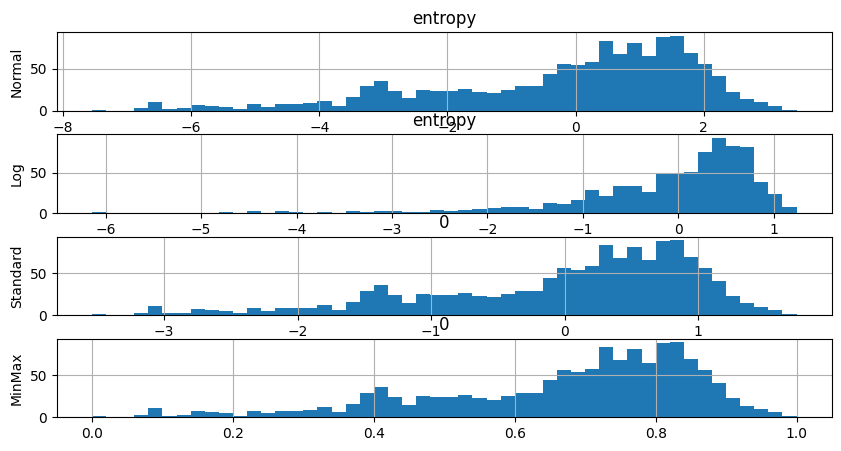

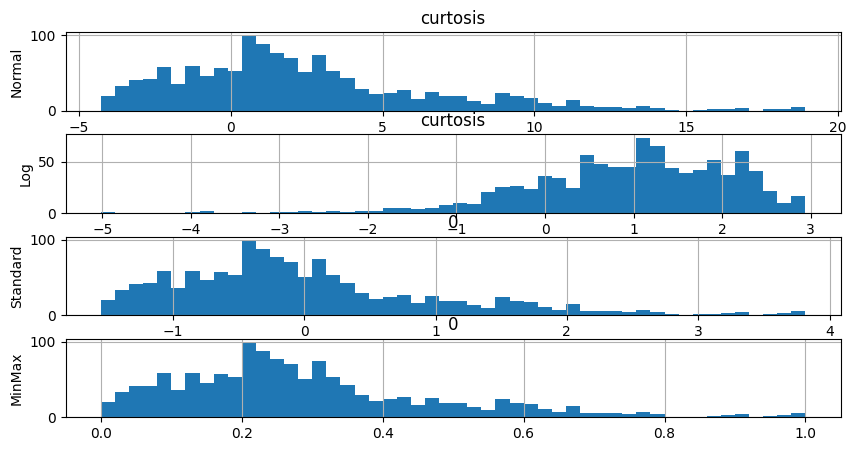

In [18]:
#list of columns to tranform
col_transform = ['entropy','curtosis']

for feature in col_transform:
    fig,(ax1,ax2,ax4,ax5) = plt.subplots(4,1,figsize = (10,5))
    pd.DataFrame(data[feature]+1).hist(ax=ax1,bins=50)
    pd.DataFrame((data[feature]+1).transform(np.log)).hist(ax=ax2,bins=50)
    pd.DataFrame(StandardScaler().fit_transform(np.array(data[feature]+1).reshape(-1,1))).hist(ax=ax4,bins=50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(data[feature]+1).reshape(-1,1))).hist(ax=ax5,bins=50)

    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')

We can normalized these features by using the one of the above features that would give us a Bell shaped Curve. But as we have less input data, we would keep it as it is. Or removing the obvious outlier.
But as number of outliers are not high, I will not removed them.

In [20]:
data1 = data.copy()

In [22]:
data1.shape

(1348, 5)

In [23]:
data1.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

### Relationship of `variance` with `Target` Variable

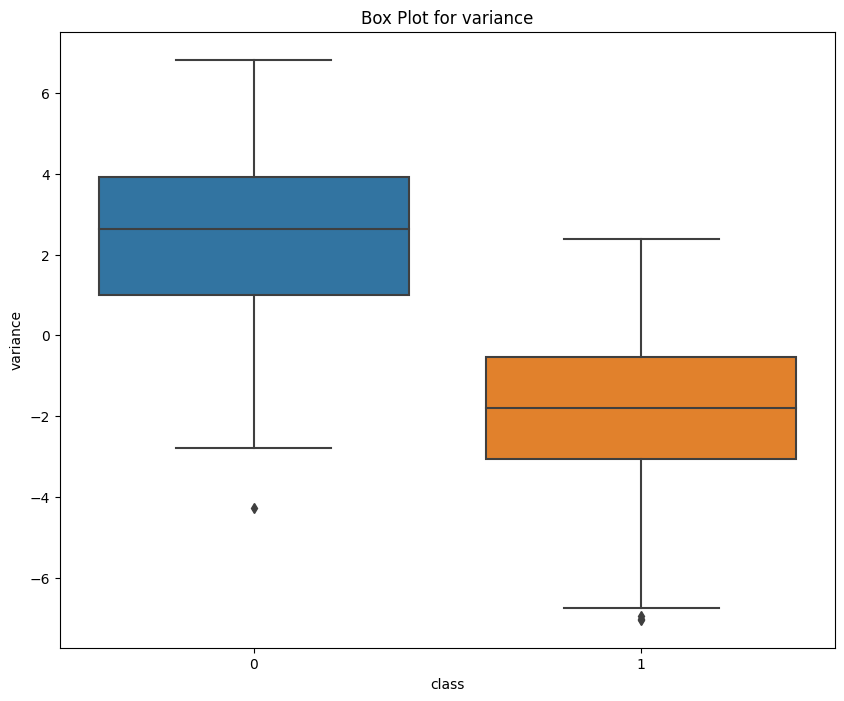

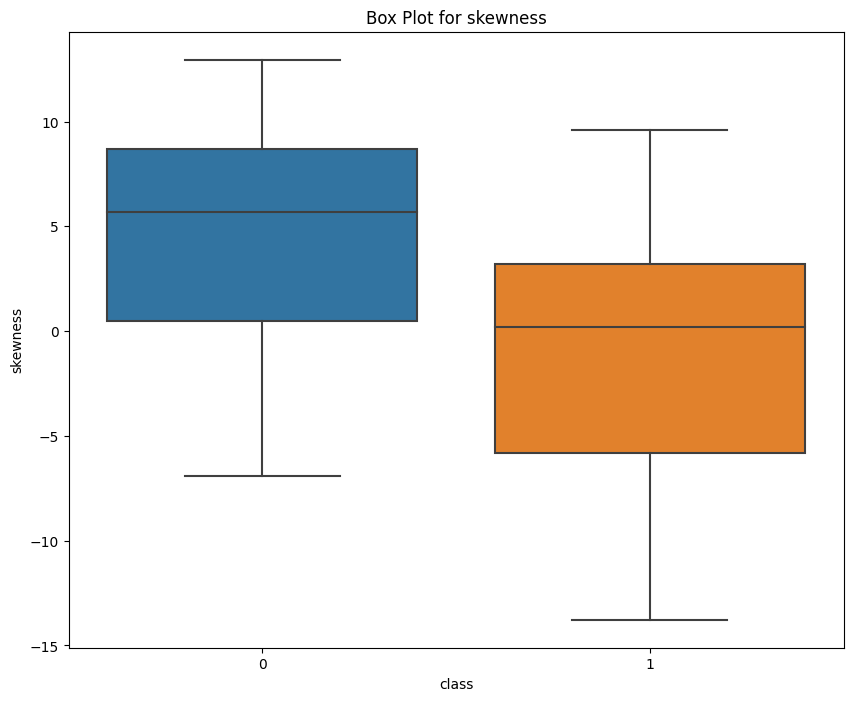

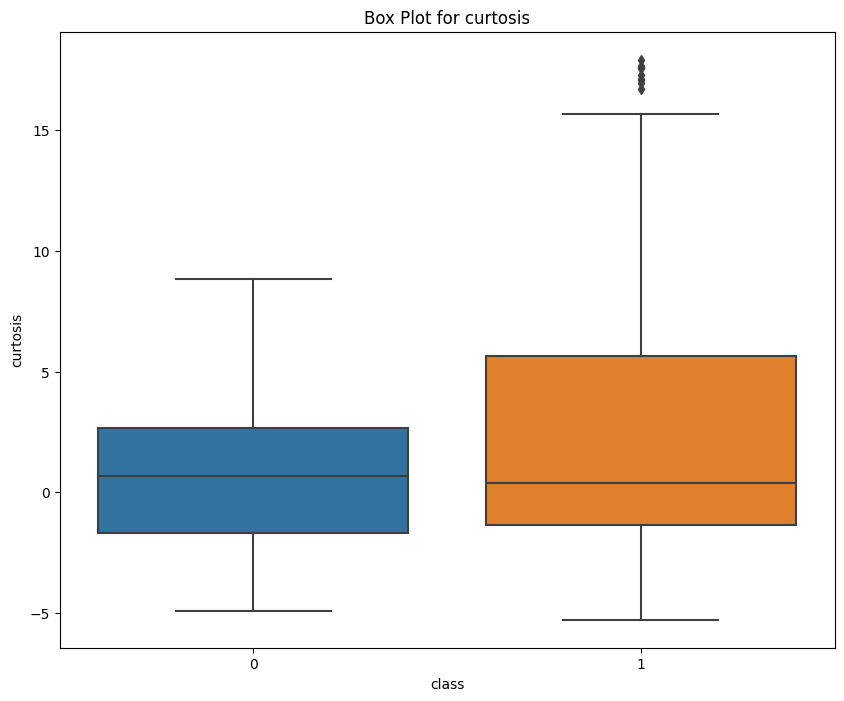

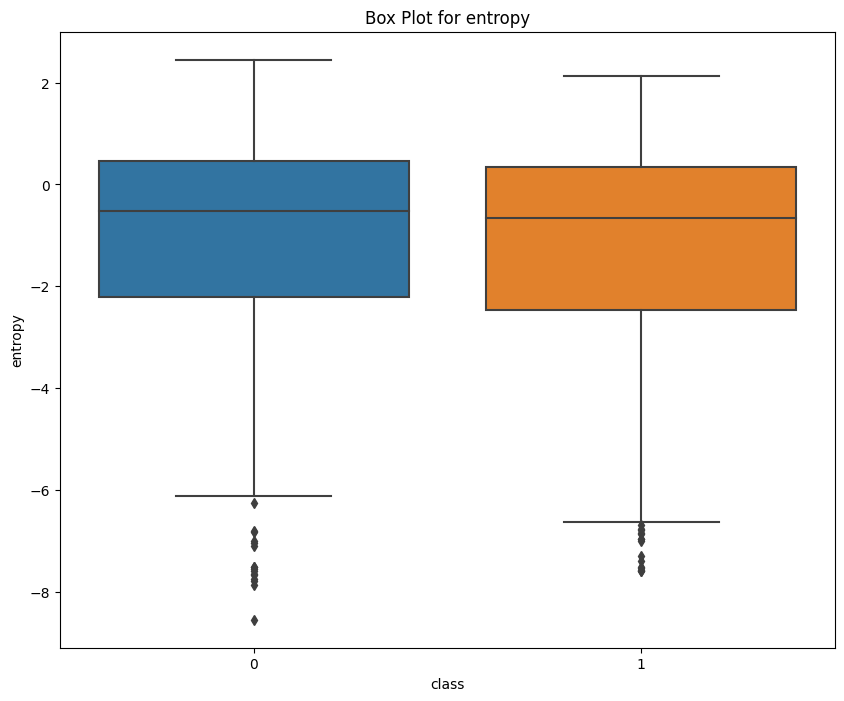

In [24]:
for feature in data1.columns[:-1]:
    plt.figure()
    sns.boxplot(x=data1['class'],y=data1[feature])
    plt.title(f'Box Plot for {feature}')

We can come to following observations
- For positive value of `variance` the class label is 1 i.e Bank Note is authentic and for negative values it's fake/counterfeit note respectively.
- 95% of class label 1 has negative skewness value.
- 95% of class label 0 has positive skenwss value.

<Axes: >

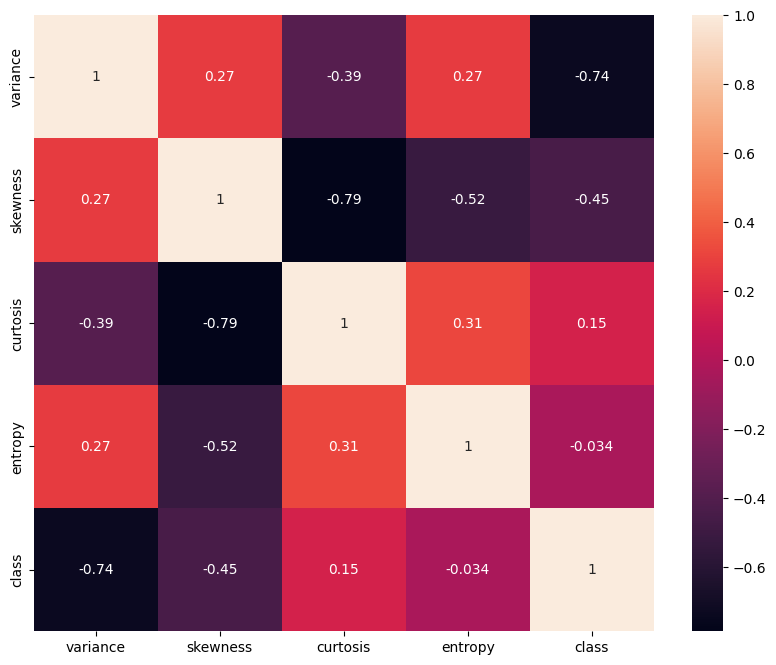

In [25]:
#finally plotting corrrealtion matrix
sns.heatmap(data.corr(),annot=True)

There is high correlation between features and the column. Also some features shows correlation among themselev.

We can train the model by performing feature selection. For now lets train the model with all feature

## <font color='green'>Model Selection and Evalulation<font><a class='anchor' id='model'>

In [26]:
#Splitting into X and y
X = data1.drop(columns = ['class'], axis = 1)
y = data1['class']


In [27]:
#performing train-test-split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [28]:
print(f'Shape of Trainning Dataset : {X_train.shape}')
print(f'Shape of Test Dataset : {X_test.shape}')

Shape of Trainning Dataset : (1078, 4)
Shape of Test Dataset : (270, 4)


### HyperParameter tunning and model building

In [33]:
#function for plotting confusion matrix
def plt_confusionMatrix(cm,label,model_name):
    '''
    plots confusion matrix
    '''
    plt.figure(figsize=(5,5))
    fig,ax=plt.subplots()
    
    im = ax.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=label, yticklabels=label,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    plt.title(f'Confusion Matrix for {model_name}')
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [30]:
#finding best parameters through GridSearchCv

#hyperparameter tunning
def find_best_model_using_features(X,y,X_test,y_test):
    algos = {
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{
                'max_iter':[100,200,500]
            }  
        },

        'Support_vector_machine':{
            'model':SVC(),
            'params':{'kernel':['linear','rbf','poly','sigmoid'],
              }
        },
        'decision_tree':{
            'model': DecisionTreeClassifier(),
            'params':{'max_depth':np.arange(2,16,2)}
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                    'n_estimators':np.arange( 20,80, 10), 
                    'max_depth': np.arange(2, 8, 2)
                }
        }
    }
    
    scores = []
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'])
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params': gs.best_params_
        })
        y_pred = gs.predict(X_test)
        cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
        plt_confusionMatrix(cm,np.unique(y_pred),algo_name)
        
        

        
    return pd.DataFrame(scores,columns=['model',"best_score",'best_params'])
        

,model,best_score,best_params
0,logistic_regression,0.991641,{'max_iter': 100}
1,Support_vector_machine,0.997214,{'kernel': 'rbf'}
2,decision_tree,0.976800,{'max_depth': 10}
3,random_forest,0.989793,"{'max_depth': 6, 'n_estimators': 20}"


<Figure size 500x500 with 0 Axes>

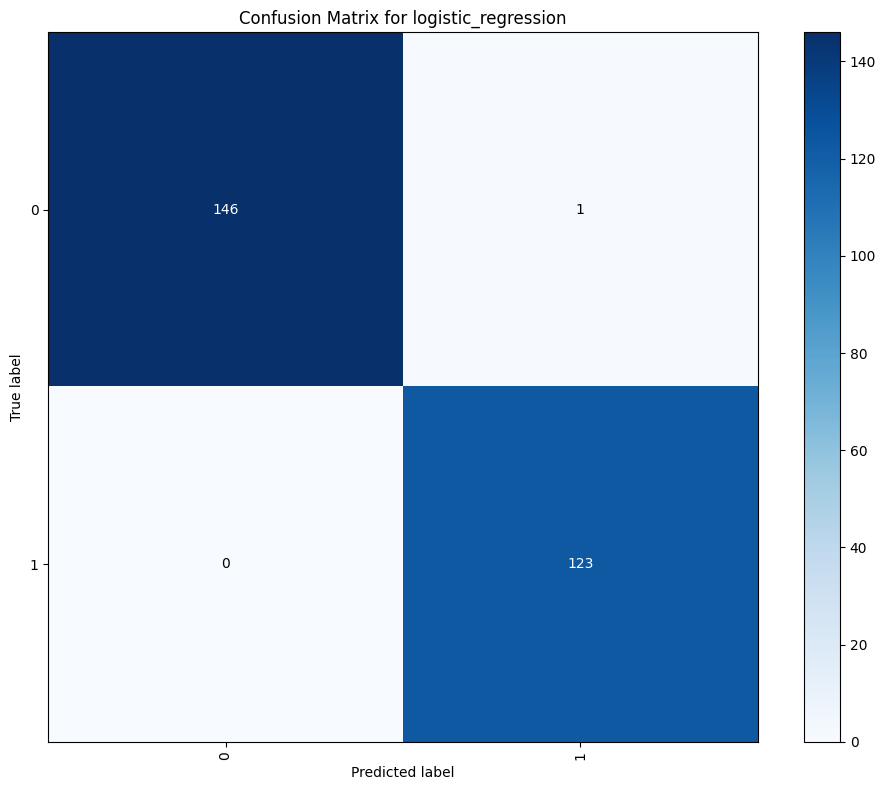

<Figure size 500x500 with 0 Axes>

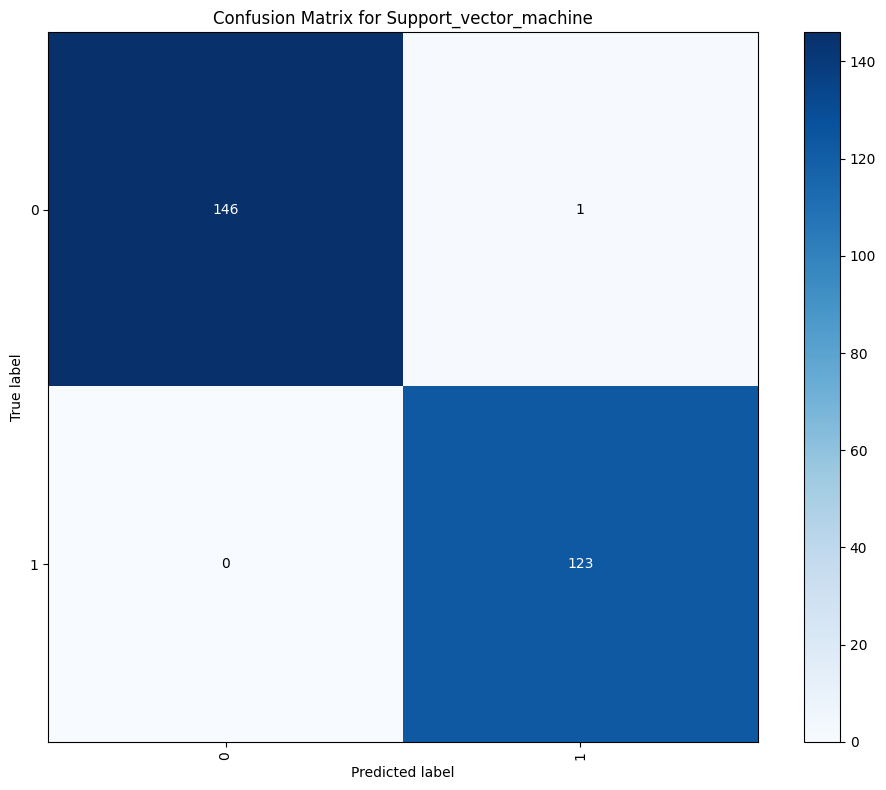

<Figure size 500x500 with 0 Axes>

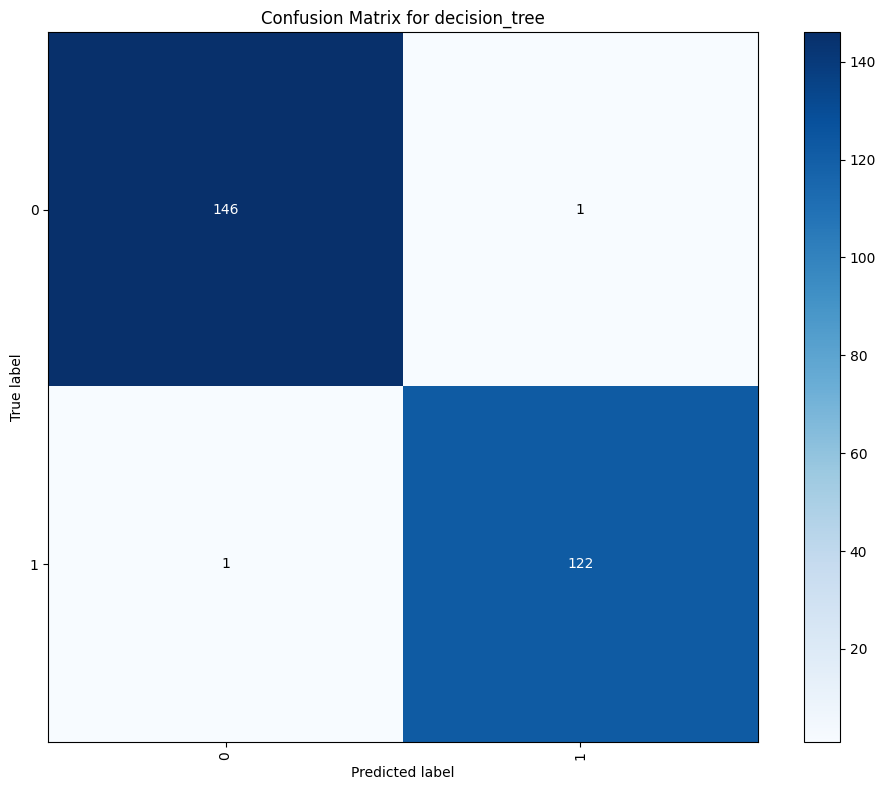

<Figure size 500x500 with 0 Axes>

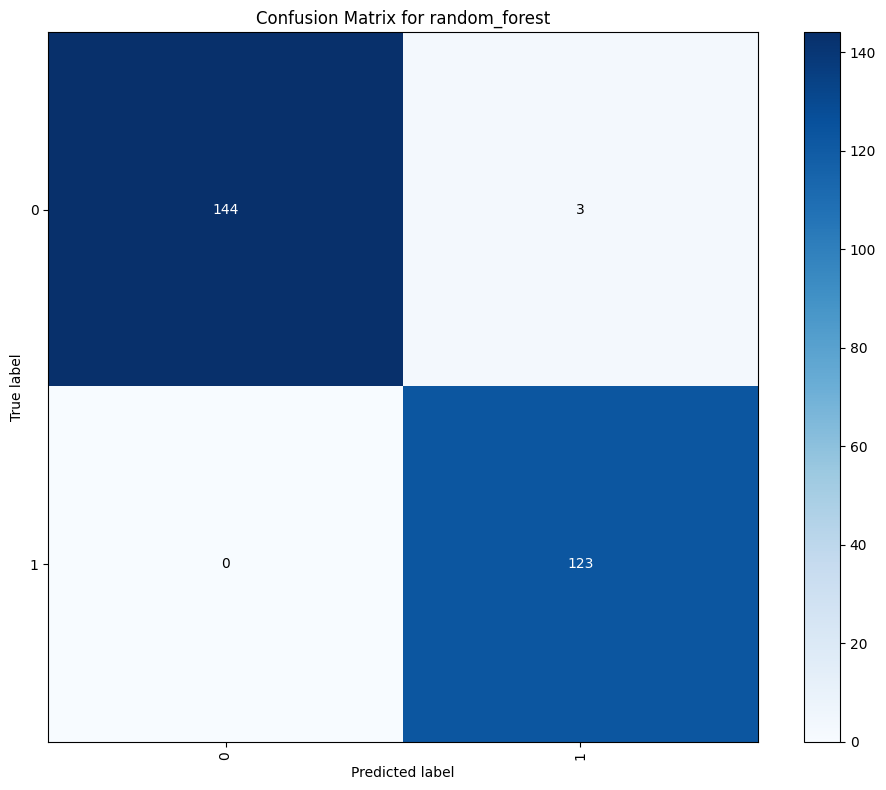

In [53]:
find_best_model_using_features(X_train,y_train,X_test,y_test)

As observed Random Forest and Support Vector Machine performs the best


In [54]:
lr_classifer = LogisticRegression(max_iter=100)
lr_classifer.fit(X_train,y_train)
lr_classifer.score(X_test,y_test)

0.9962962962962963

In [55]:
y_pred = lr_classifer.predict(X_test)
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       147
           1       0.99      1.00      1.00       123

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [51]:
print('Acutal Values:')
print(y_test[:10])

Acutal Values:
863     1
186     0
886     1
766     1
548     0
144     0
645     0
686     0
1071    1
55      0
Name: class, dtype: int64


In [52]:
print('predicted Output')
print(y_pred[:10])

predicted Output
[1 0 1 1 0 0 0 0 1 0]


In [56]:
#selecting a model and exporting to vector file
import pickle
with open('geekschallenge_Renuka_Wadikar.pickle','wb') as f:
    pickle.dump(lr_classifer,f)

# Project Report 

- After Loading the Dataset , performed data cleaning and exploration like present of null or duplicated values
- plotted variours bar graphs and distribution plot to see if the particulare feature was tail heavy or not
- Almost all the features were normally distributed.
- The dataset was also not imbalanced on the target variable
- After ploting correlation matrix , box plots it was observed that `variance` and `skweness` features shows visible relation with the target variable.
- Performed Hyperparamater tunning with help of GridSearchCv to check which model works best
- Logistic model was more accurate with 99.6% accuracy on the test dataset.
- Selected Logistic model due to following reasons:
    - Used for binary classification
    - More robust towards outliers
    - Show better perfomance in our case